In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
#from google_play_scraper import app, Sort, reviews_all
from api_keys import google_play_api_key 
import datetime

In [12]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
chart_studio.tools.set_credentials_file(username='sathwikkes', api_key=google_play_api_key)
from plotly.offline import plot

In [3]:
df = pd.read_csv("vice-app-reviews.csv")

In [4]:
df.head()

,Unnamed: 0,date,developerResponse,review,rating,isEdited,title,userName
0,0,2020-09-10 04:44:14,"{'id': 19026103, 'body': ""No, it's not necessa...",I love Vice! You guys have some amazing conten...,3,False,Great but...,Oversilence
1,1,2023-09-29 18:40:15,NaN,I gave it a shot considering how fantastic vic...,2,False,What is happening with this app,Bairock1
2,2,2021-01-22 18:35:12,NaN,Love vice news and their investigative journal...,5,False,"Great app, needs better editors",PLIFIT
3,3,2023-01-12 17:22:17,NaN,I downloaded the app and tried to create an ac...,1,False,App doesn’t work at all,Michelebella1977
4,4,2021-07-16 01:34:04,NaN,I am in the middle of politics. I struggle bet...,1,False,It’s not really news.,WOWE!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         200 non-null    int64 
 1   date               200 non-null    object
 2   developerResponse  39 non-null     object
 3   review             200 non-null    object
 4   rating             200 non-null    int64 
 5   isEdited           200 non-null    bool  
 6   title              200 non-null    object
 7   userName           200 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 11.3+ KB


In [6]:
df["date"].min()

'2013-01-22 15:37:30'

In [7]:
df["date"].max()

'2023-09-29 18:40:15'

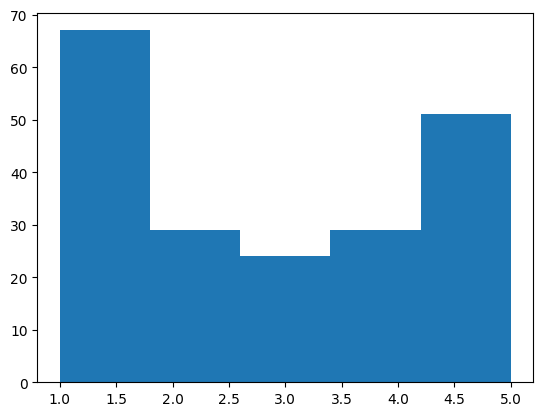

In [8]:
plt.hist(df['rating'], bins=5)
plt.show()

In [9]:
df["rating"].value_counts() 

1    67
5    51
2    29
4    29
3    24
Name: rating, dtype: int64

In [10]:
fg = px.histogram(df, x = 'rating', nbins=5, color="rating", text_auto=True)
fg.show()

In [16]:
chart_studio.tools.set_config_file(world_readable=True, sharing='public')
py.plot(fg, filename = "Count-of-Ratings", auto_open=False)

'https://plotly.com/~sathwikkes/7/'

In [ ]:
df["rating"].mean()

2.84

In [ ]:
df["date"] = pd.to_datetime(df["date"])
#new_format = "%Y-%m-%d"
#df["date"] = df["date"].dt.strftime(new_format)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         200 non-null    int64         
 1   date               200 non-null    datetime64[ns]
 2   developerResponse  39 non-null     object        
 3   review             200 non-null    object        
 4   rating             200 non-null    int64         
 5   isEdited           200 non-null    bool          
 6   title              200 non-null    object        
 7   userName           200 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 11.3+ KB


In [ ]:
df["year"] =df['date'].apply(lambda x: x.strftime('%Y'))

In [ ]:
mean_ratings = df.groupby(["year"])['rating'].mean().reset_index()

# Create a visually pleasing line chart using Plotly Express
fig = px.line(mean_ratings, x="year", y="rating", markers=True, line_shape='linear',
              labels={"year": "Year", "rating": "Mean Rating"},
              title="Line Chart of Mean Ratings by Year")

# Customize the layout (optional)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Mean Rating",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    plot_bgcolor='white',
)

# Show the plot
fig.show()


In [ ]:
rating_counts = df.groupby(["year"])['rating'].value_counts().reset_index(name='count')

In [ ]:
fig = px.bar(rating_counts, x="year", y="count", color="rating",
             labels={"year": "Year", "count": "Count", "rating": "Rating"},
             title="Side-by-Side Bar Chart of Ratings by Year")

# Customize the visual appearance (optional)
fig.update_layout(
    barmode='group',  # Display bars side by side
    xaxis_title="Year",
    yaxis_title="Count",
    legend_title="Rating"
)

# Show the plot
fig.show()

In [ ]:
##rom transformers import pipeline

#sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")